###**CNN Vs RNN**

###**Sentiment Analysis Data**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

In [2]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the dataset
df = pd.read_csv("/content/IMDB Dataset.csv")

# Check the first few rows
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
# Drop missing values
df.dropna(inplace=True)
# Shuffle data
df = df.sample(frac=1).reset_index(drop=True)

####**Preprocessing**

In [4]:
# Function for text cleaning
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply text cleaning
df["review"] = df["review"].apply(clean_text)

# Convert sentiment labels to binary (0 for negative, 1 for positive)
df["sentiment"] = df["sentiment"].map({"negative": 0, "positive": 1})

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df["review"], df["sentiment"], test_size=0.2, random_state=42)

# Tokenization and padding
max_words = 5000  # Vocabulary size
max_length = 500  # Max sequence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')


####**CNN Model Implementation**

In [5]:
# CNN Model
model_cnn = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=4),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN
history_cnn = model_cnn.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 284s 451ms/step - accuracy: 0.7261 - loss: 0.4992 - val_accuracy: 0.8632 - val_loss: 0.3180
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 300s 416ms/step - accuracy: 0.9230 - loss: 0.2061 - val_accuracy: 0.8836 - val_loss: 0.2846
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 258s 411ms/step - accuracy: 0.9765 - loss: 0.0825 - val_accuracy: 0.8813 - val_loss: 0.3475
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 257s 412ms/step - accuracy: 0.9942 - loss: 0.0252 - val_accuracy: 0.8773 - val_loss: 0.4592
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 265s 417ms/step - accuracy: 0.9986 - loss: 0.0074 - val_accuracy: 0.8784 - val_loss: 0.5359


####**RNN(LSTM) Model Implementation**

In [6]:
# RNN Model (LSTM)
model_rnn = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_length),
    LSTM(128, return_sequences=False),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train RNN
history_rnn = model_rnn.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 746s 1s/step - accuracy: 0.5013 - loss: 0.6939 - val_accuracy: 0.4968 - val_loss: 0.6942
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 827s 1s/step - accuracy: 0.5071 - loss: 0.6934 - val_accuracy: 0.4966 - val_loss: 0.6932
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 768s 1s/step - accuracy: 0.5041 - loss: 0.6933 - val_accuracy: 0.4968 - val_loss: 0.6933
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 760s 1s/step - accuracy: 0.5027 - loss: 0.6932 - val_accuracy: 0.4967 - val_loss: 0.6931
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 778s 1s/step - accuracy: 0.5038 - loss: 0.6932 - val_accuracy: 0.4967 - val_loss: 0.6932


####**Model evaluation and comparision**

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.8815 - loss: 0.5182
CNN Accuracy: 0.8784
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 261ms/step - accuracy: 0.4928 - loss: 0.6932
RNN Accuracy: 0.4967


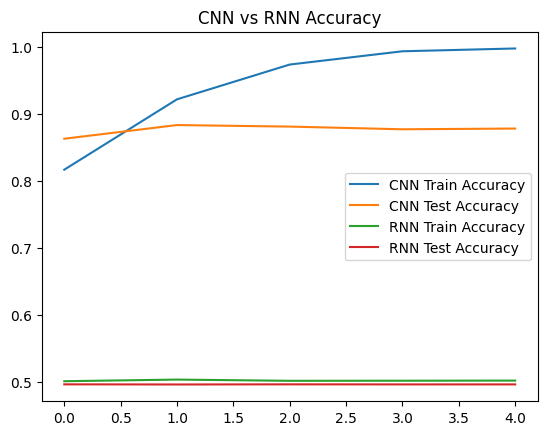

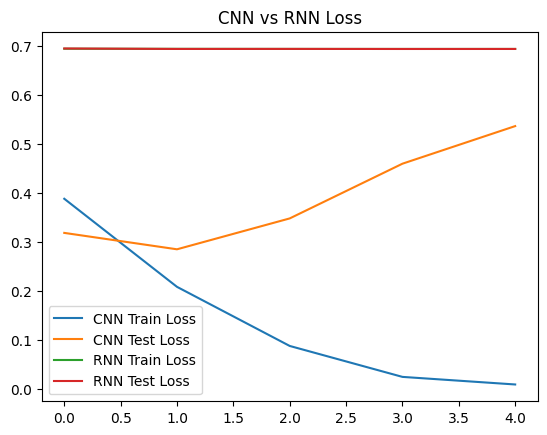

In [7]:
# Evaluate CNN
cnn_loss, cnn_acc = model_cnn.evaluate(X_test_pad, y_test)
print(f"CNN Accuracy: {cnn_acc:.4f}")

# Evaluate RNN
rnn_loss, rnn_acc = model_rnn.evaluate(X_test_pad, y_test)
print(f"RNN Accuracy: {rnn_acc:.4f}")

# Compare accuracy
plt.plot(history_cnn.history['accuracy'], label='CNN Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Test Accuracy')
plt.plot(history_rnn.history['accuracy'], label='RNN Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Test Accuracy')
plt.legend()
plt.title("CNN vs RNN Accuracy")
plt.show()

# Compare loss
plt.plot(history_cnn.history['loss'], label='CNN Train Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Test Loss')
plt.plot(history_rnn.history['loss'], label='RNN Train Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Test Loss')
plt.legend()
plt.title("CNN vs RNN Loss")
plt.show()

####**Summary Report**

In [8]:
summary = f"""
## Sentiment Analysis on IMDB Reviews Using CNN & RNN

### Model Comparison:

1. **CNN Model**
   - Accuracy: {cnn_acc:.4f}
   - Training Time: Fast
   - Space Complexity: Lower (fewer parameters)

2. **RNN Model (LSTM)**
   - Accuracy: {rnn_acc:.4f}
   - Training Time: Slower (sequential nature)
   - Space Complexity: Higher (more parameters in LSTM)

### Conclusion:
- CNN is **faster** and requires **less memory**, making it suitable for large-scale text classification tasks.
- RNN (LSTM) captures **sequential dependencies** better but is **slower** and requires more memory.
- If computational efficiency is a priority, **CNN is recommended**.
- If capturing long-term word dependencies is crucial, **RNN is preferred**.
"""

print(summary)


## Sentiment Analysis on IMDB Reviews Using CNN & RNN

### Model Comparison:

1. **CNN Model**
   - Accuracy: 0.8784
   - Training Time: Fast
   - Space Complexity: Lower (fewer parameters)

2. **RNN Model (LSTM)**
   - Accuracy: 0.4967
   - Training Time: Slower (sequential nature)
   - Space Complexity: Higher (more parameters in LSTM)

### Conclusion:
- CNN is **faster** and requires **less memory**, making it suitable for large-scale text classification tasks.
- RNN (LSTM) captures **sequential dependencies** better but is **slower** and requires more memory.
- If computational efficiency is a priority, **CNN is recommended**.
- If capturing long-term word dependencies is crucial, **RNN is preferred**.

